<a href="https://colab.research.google.com/github/Aya-Elhoseny77/Survivor-Team/blob/main/Vehicles_Engine_Health_cleaned_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

In [ ]:
df = pd.read_csv("/content/engine_data.csv")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
df['Engine Condition'].value_counts()
# 0 means all is good
# 1 means the engin has a problem

,count
Engine Condition,
1,12317
0,7218


In [ ]:
#detect the null values
df.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


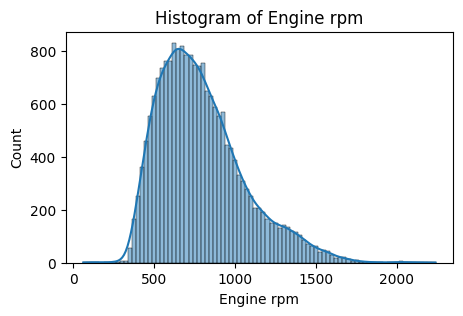

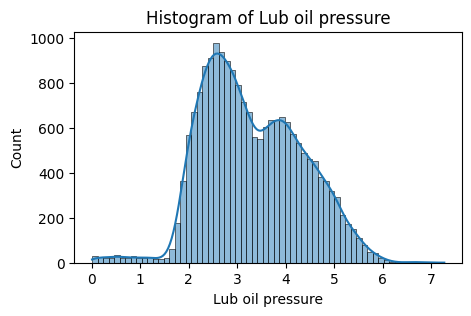

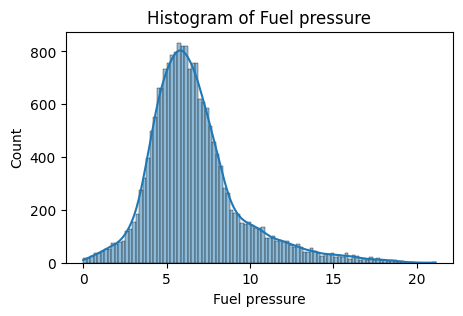

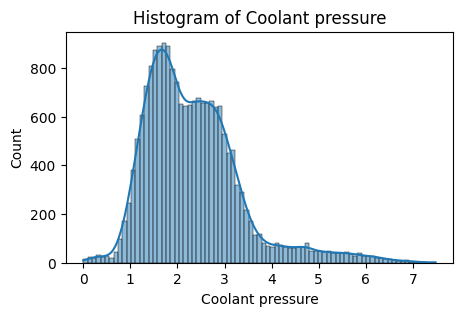

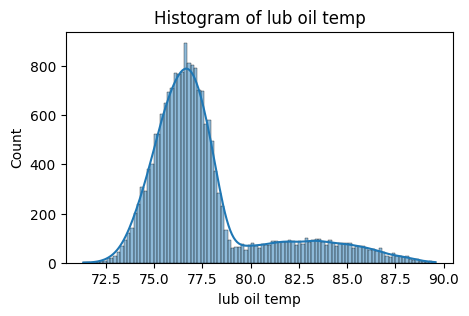

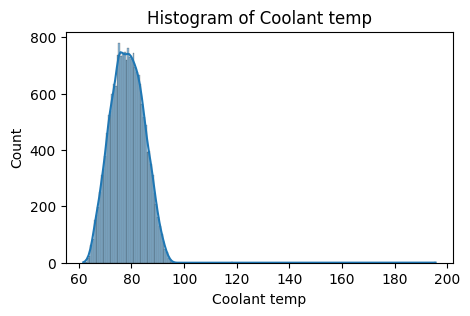

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


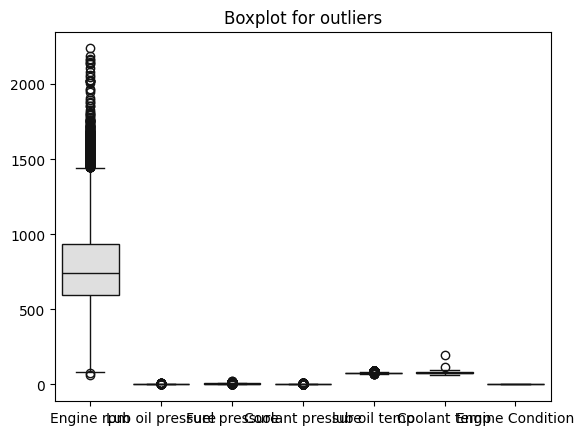

In [ ]:
#checking the outliers(increase the accuracy)
sns.boxplot(data=df,palette='binary')
plt.title("Boxplot for outliers")
plt.show()


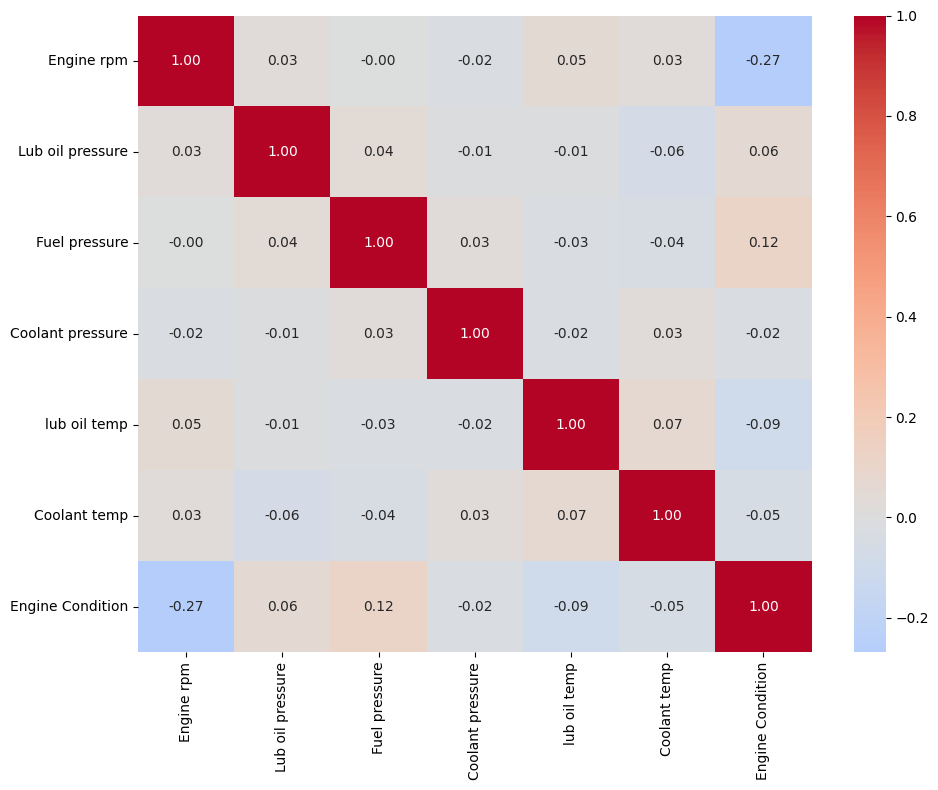

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Adjust the plot
plt.tight_layout()

# Show the plot
plt.show()

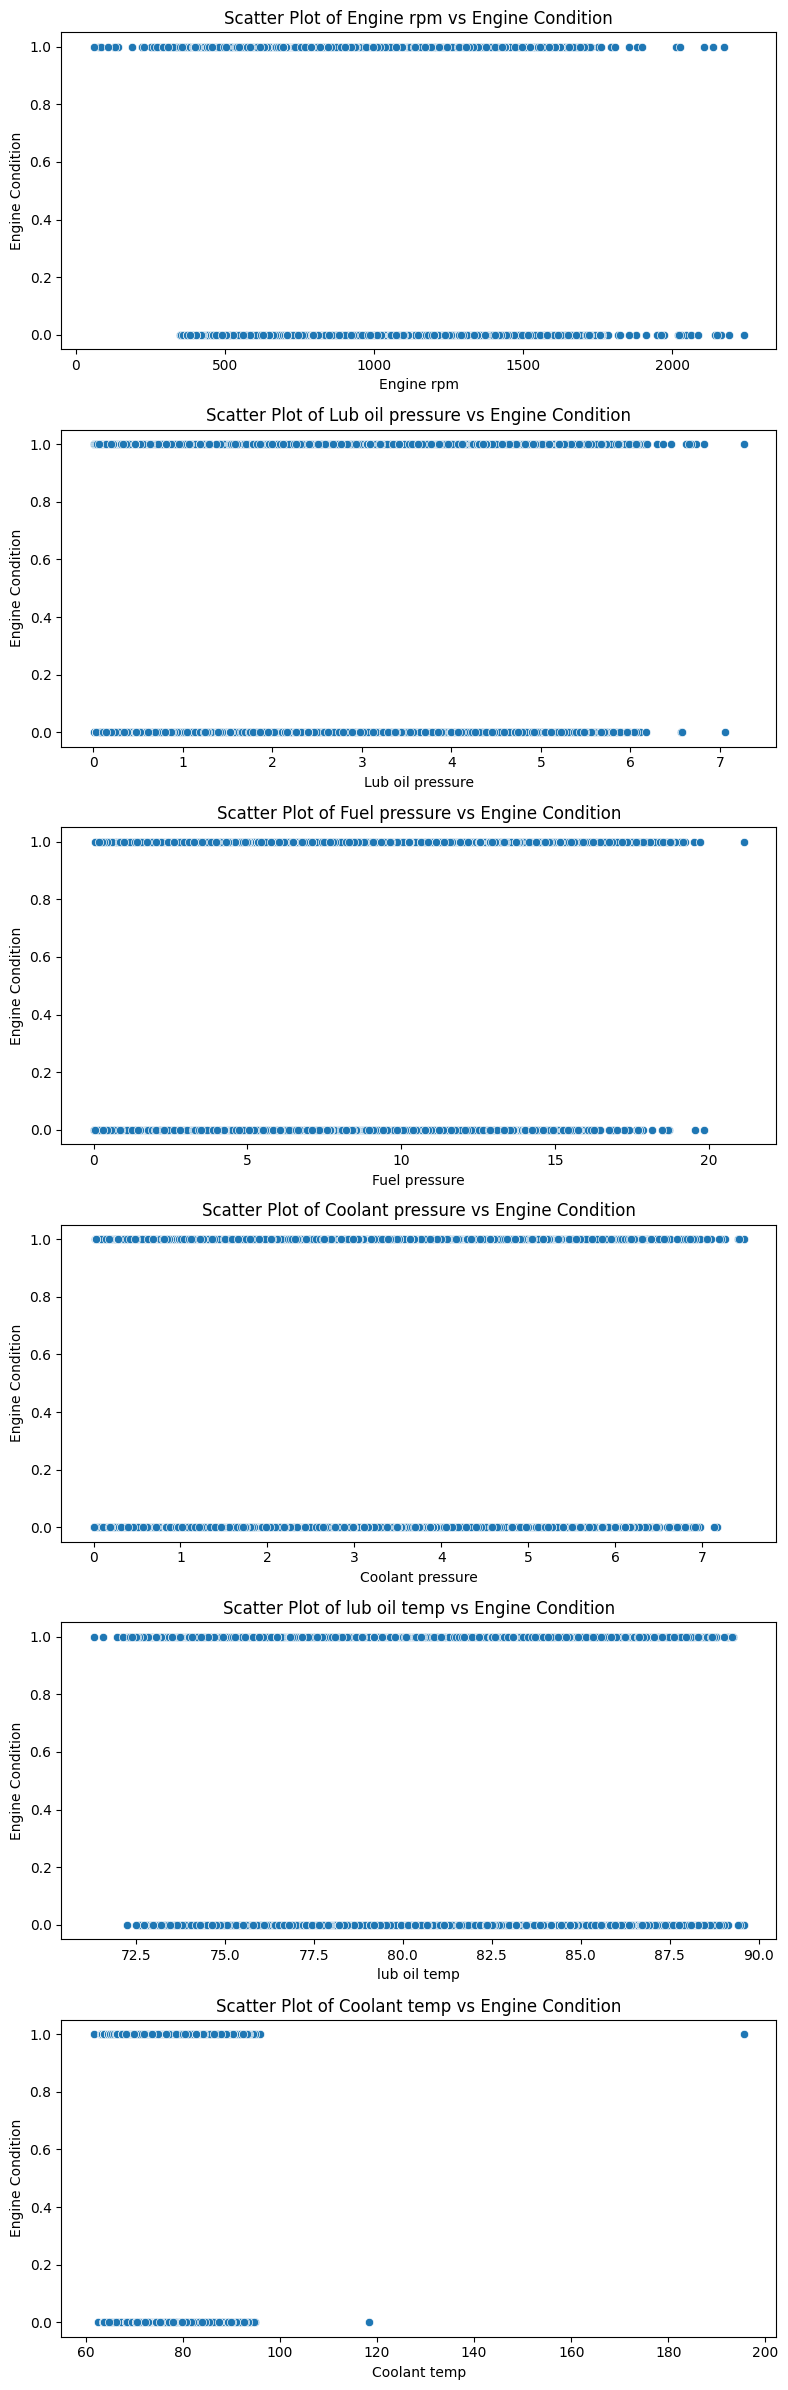

In [ ]:
# Plot scatter plots for each feature against engine condition
num_sensors = len(df.columns) - 1  # minus 1 to exclude the target variable
fig, axes = plt.subplots(nrows=num_sensors, ncols=1, figsize=(8, num_sensors*4))

# If only one feature is present, 'axes' will not be an array, so we wrap it into a list
if num_sensors == 1:
    axes = [axes]

for i, column in enumerate(df.columns[:-1]):  # exclude the target variable
    sns.scatterplot(data=df, x=column, y='Engine Condition', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs Engine Condition')

plt.tight_layout()
plt.show()

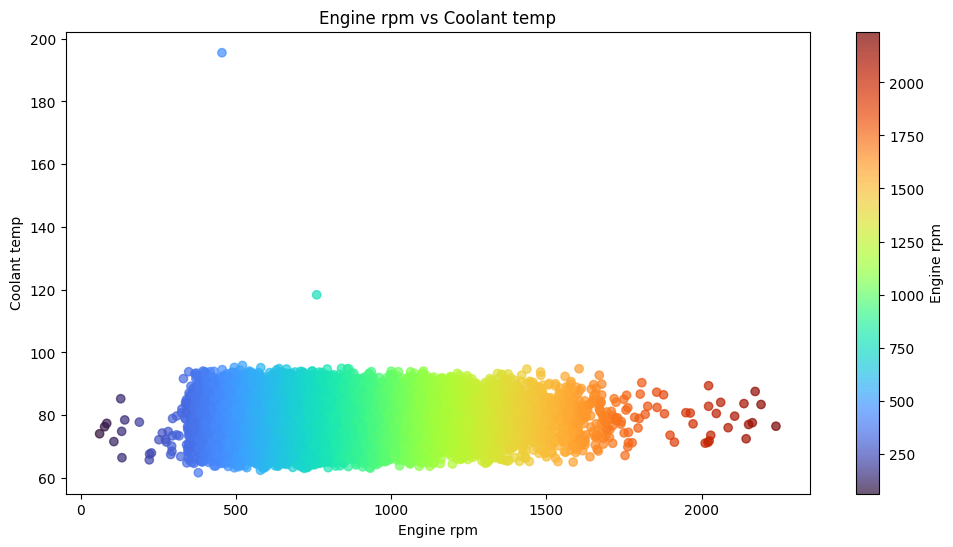

In [ ]:
plt.figure(figsize =(12, 6))
scatter = plt.scatter(
    df["Engine rpm"],
    df["Coolant temp"],
    c = df["Engine rpm"],
    cmap = 'turbo',
    alpha = 0.7
)
plt.colorbar(scatter, label = 'Engine rpm')
plt.title("Engine rpm vs Coolant temp")
plt.xlabel("Engine rpm")
plt.ylabel("Coolant temp")
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is our DataFrame and 'features' are our columns of interest
features = df.columns[:-1]  # Exclude the target variable 'Engine Condition'

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the features and transform
data_scaled = scaler.fit_transform(df[features])

# Convert the array back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=features)

# Optionally, we can add the target variable back to the scaled DataFrame
data_scaled['Engine Condition'] = df['Engine Condition']

# Now 'data_scaled' is a DataFrame with the scaled features

In [ ]:
print(data_scaled.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.134897         -0.435055       1.976321          0.810733   
1    0.381232         -0.143466       3.533182          0.238407   
2   -0.662757         -0.130358       0.124263         -0.883178   
3   -0.800587          0.355233       4.705814          1.250084   
4   -0.372434          1.634204       3.372298         -0.091825   

   lub oil temp  Coolant temp  Engine Condition  
0      3.123507      0.364249                 1  
1      0.351104      0.454442                 0  
2      0.398566      0.144026                 1  
3     -1.145689     -0.728608                 1  
4      0.673419      0.959376                 0  


In [ ]:
from sklearn.decomposition import PCA

# Decide on the number of components, in our example, we decided to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the scaled feature data (excluding the target variable)
pca.fit(data_scaled[features])

# Transform the scaled data to the new PCA space
data_pca = pca.transform(data_scaled[features])

# The result 'data_pca' is an array with the new principal component features
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca_df['Engine Condition'] = data_scaled['Engine Condition']

# Display the first few rows of the PCA transformed dataset
print(data_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6  \
0  2.677408  1.947451  0.676164 -0.288670  0.545162 -0.333620   
1 -0.111593  3.317604 -0.167982  0.258974  0.764730 -0.049724   
2  0.040618 -0.145400 -0.819095 -0.953780  0.370164 -0.012291   
3 -1.797852  4.590964  0.764287 -0.755045 -0.380401 -0.151450   
4  0.202036  3.217016 -0.373954 -0.402102  0.292156  1.797070   

   Engine Condition  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0  


In [ ]:
from sklearn.ensemble import IsolationForest


# Prepare the features for anomaly detection (exclude the target variable)
features_pca = data_pca_df.drop('Engine Condition', axis=1)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the PCA-transformed data
iso_forest.fit(features_pca)

# Predict anomalies (-1 for outliers and 1 for inliers)
anomalies = iso_forest.predict(features_pca)

# Add the anomaly scores to the PCA DataFrame
data_pca_df['Anomaly'] = anomalies

# Show the head of the DataFrame including the anomaly scores
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Engine Condition,Anomaly
0,2.677408,1.947451,0.676164,-0.288670,0.545162,-0.333620,1,1
1,-0.111593,3.317604,-0.167982,0.258974,0.764730,-0.049724,0,1
2,0.040618,-0.145400,-0.819095,-0.953780,0.370164,-0.012291,1,1
3,-1.797852,4.590964,0.764287,-0.755045,-0.380401,-0.151450,1,-1
4,0.202036,3.217016,-0.373954,-0.402102,0.292156,1.797070,0,-1


In [ ]:
# Filter the anomalies from the DataFrame
anomalies_df = data_pca_df[data_pca_df['Anomaly'] == -1]

# Now you can perform various analyses on 'anomalies_df'
# For example, let's look at the basic statistics of the anomalies
anomaly_stats = anomalies_df.describe()

# You might also want to see if certain conditions are more associated with anomalies
anomaly_conditions_count = anomalies_df['Engine Condition'].value_counts()

# Output the statistics and condition counts for review
print(anomaly_stats)
print(anomaly_conditions_count)

               PC1          PC2          PC3          PC4          PC5  \
count  2352.000000  2352.000000  2352.000000  2352.000000  2352.000000   
mean      0.987497     0.655557     0.377768     0.392527    -0.074961   
std       1.970813     1.570045     1.385682     1.118496     0.965249   
min      -2.245255    -2.359036    -2.251262    -2.174516    -2.399789   
25%      -0.645310    -0.516567    -0.714075    -0.534004    -0.775095   
50%       0.241056     0.315515     0.019238     0.196738    -0.114482   
75%       2.904694     1.786732     1.336841     1.237656     0.652213   
max       5.076241     5.027496     4.158641     4.273478    11.466488   

               PC6  Engine Condition  Anomaly  
count  2352.000000       2352.000000   2352.0  
mean      0.005677          0.584609     -1.0  
std       0.861719          0.492894      0.0  
min      -2.396258          0.000000     -1.0  
25%      -0.636938          0.000000     -1.0  
50%       0.018216          1.000000     -1.0

In [ ]:
# The features for the model will include the PCA components and the 'Anomaly' score
features = [col for col in data_pca_df.columns if col not in ['Engine Condition']]

# Now we create the feature set (X) and the target variable (y)
X = data_pca_df[features]
y = data_pca_df['Engine Condition']

# The resulting X DataFrame will be used to train the model, and y will be the target you predict

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data_pca_df.drop('Engine Condition', axis=1)  # All columns except the target
y = data_pca_df['Engine Condition']                # Target column

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are now your training data, and X_test and y_test are your testing data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# The model is now trained and can be used to make predictions on the test set

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predicting the target values for the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.54      0.38      0.45      1459
           1       0.69      0.80      0.74      2448

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907

Accuracy: 0.64601996416688


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,       # Maximum depth of a tree
    random_state=42    # Seed for reproducibility
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicting the target values for the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model's performance
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

              precision    recall  f1-score   support

           0       0.56      0.35      0.43      1459
           1       0.68      0.84      0.75      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.59      0.59      3907
weighted avg       0.64      0.65      0.63      3907

Accuracy: 0.6536984898899412


In [ ]:
# Import SVM and necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Scale the features (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the SVM Classifier
svm_model = SVC(
    kernel='rbf',  # Radial Basis Function kernel (you can also try 'linear', 'poly', or 'sigmoid')
    C=1.0,         # Regularization parameter
    gamma='scale', # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=42
)

In [ ]:
#Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predicting the target values for the scaled test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the model's performance
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")

              precision    recall  f1-score   support

           0       0.58      0.25      0.35      1459
           1       0.67      0.89      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.57      0.56      3907
weighted avg       0.63      0.65      0.61      3907

Accuracy: 0.6521627847453288


عشان ا save الموديل واقدر استخدمو

In [ ]:
import joblib

# Save the model and preprocessing objects
joblib.dump(model, 'engine_condition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

real-time prediction script, load the saved model and preprocessing objects.

الكود دي المفروض يعني اننا هنستخدمها عشان نربط السنسورز ففي اسماء كدا جوا من الدماغ لسا لما نشوف يعني

In [ ]:
import joblib

# Load the model and preprocessing objects
model = joblib.load('engine_condition_model.pkl')
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')

read data from the sensor

In [ ]:
!pip install pyserial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import serial

In [ ]:
# Configure the serial connection
'''ser = serial.Serial(
    port='COM3',  # Replace with your sensor's port
    baudrate=9600,  # Match the baud rate of your sensor
    timeout=1
)

def read_sensor_data():
    """Read sensor data from the serial connection."""
    if ser.in_waiting > 0:
        line = ser.readline().decode('utf-8').strip()
        data = list(map(float, line.split(',')))  # Convert comma-separated values to a list of floats
        return data
    return None'''

'ser = serial.Serial(\n    port=\'COM3\',  # Replace with your sensor\'s port\n    baudrate=9600,  # Match the baud rate of your sensor\n    timeout=1\n)\n\ndef read_sensor_data():\n    """Read sensor data from the serial connection."""\n    if ser.in_waiting > 0:\n        line = ser.readline().decode(\'utf-8\').strip()\n        data = list(map(float, line.split(\',\')))  # Convert comma-separated values to a list of floats\n        return data\n    return None'

process sensor data

In [ ]:
'''def preprocess_data(sensor_data):
    """Preprocess the sensor data for prediction."""
    # Convert the sensor data to a DataFrame
    sensor_df = pd.DataFrame([sensor_data], columns=features)  # Replace 'features' with your feature names

    # Scale the data
    scaled_data = scaler.transform(sensor_df)

    # Apply PCA
    pca_data = pca.transform(scaled_data)

    return pca_data'''

make prediction

In [ ]:
'''def predict_engine_condition(pca_data):
    """Predict the engine condition using the trained model."""
    prediction = model.predict(pca_data)
    return "Good" if prediction[0] == 1 else "Bad"'''

Combine everything into a loop for real time prediction

In [ ]:
'''import time

while True:
    # Read sensor data
    sensor_data = read_sensor_data()
    if sensor_data:
        # Preprocess the data
        pca_data = preprocess_data(sensor_data)

        # Make a prediction
        engine_condition = predict_engine_condition(pca_data)

        # Output the result
        print(f"Engine Condition: {engine_condition}")

    # Wait for a short period before reading again
    time.sleep(1)  # Adjust the delay as needed'''